# Project 3 Collaboration and Competition

This notebook shows the runtime for a Multi Agent SAC (Soft Actor-Critic) Agent against the Tennis Reacher environment.
The training does happen in `train_sac_headless.py` as the successful training took several hours and it was hard for me to maintain the training process in a jupyter notebook. For this reason, this notebook shows the result of the training (plot of rewards over training episodes and running the agent with trained model weights).

### 1. Import of Libraries and Initialisation of environment and agent


In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt

from train_sac_headless import init_environment
from multi_sac_agent import Agent

Setting the hyperparameters that has be used for successful training

In [2]:
# see Agent class for short descriptions of hyperparameters
hyperparameters={
    "buffer_size": 10000,
    "batch_size": 64,
    "lin_full_con_01": 256,
    "lin_full_con_02": 256,
    "gamma": 0.99,
    "tau": 5e-3,
    "learning_rate": 3e-4,
    "initial_rand_steps": 100,
    "entropy_weight": 25e-5
}


### 2. Agent with Random Actions in the Environment



Initialise the agent, which also initialises the actor and critic models and the unity environment:

In [3]:
agent, env, brain_name = init_environment(hyperparameters=hyperparameters)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


##Reacher Environment##

# Environment Details
- Number of Agents: 2
- Size of Action (Continuous): 2 
- Number of state variables: 24

# Hyper Parameters
{'batch_size': 64,
 'buffer_size': 10000,
 'entropy_weight': 0.00025,
 'gamma': 0.99,
 'initial_rand_steps': 100,
 'learning_rate': 0.0003,
 'lin_full_con_01': 256,
 'lin_full_con_02': 256,
 'tau': 0.005}
    


We can see in the parameters of the used reacher environment, which is the environment with a single agent and the previously initialised hyperparameters.

The environment is already initialised. To run a "demo" agent against the environment we need to extract some further values from the environment:


In [4]:
# resets the environment and returns the object with all information about a fresh environment
env_info = env.reset(train_mode=False)[brain_name]
num_agents = len(env_info.agents)

# the brain includes the information about the size and format of the possible actions
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size

In [5]:
# reset the environment for a random agent run
env_info = env.reset(train_mode=False)[brain_name]  

In [ ]:
timesteps = 10000
scores = []                                              # initialize the score 
for t in range(1, timesteps):
    actions = np.random.randn(num_agents, action_size) # select an action
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state 
    rewards = env_info.rewards                         # get reward 
    dones = env_info.local_done                        # see if episode finished
    scores.append(env_info.rewards)                          # update the score 
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

print('Total score this amount of timesteps: {}'.format(np.mean([score[0] for score in scores])))

In [8]:
env.close()

### 3. Run actions with the trained agent

Now we're running the agent again but with pretrained model weights. This means, the agent runs now with the knowledge and learned experience of around 250 training episodes. The following plot shows the development of the rewards after each episode for all training episodes. 

#### Plot the development of the rewards over the training episodes

In [3]:
import ast

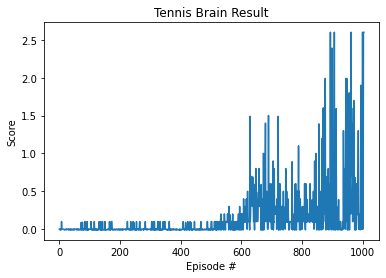

In [4]:
with open("final_scores.txt") as f:
    str_scores = f.readlines()

float_scores = [float(ast.literal_eval(score.strip())[0]) for score in str_scores]

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(float_scores)), float_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title("Tennis Brain Result")
plt.show()

#### Run the agent with the pretrained weights

Initialise new Environment and agent and load the model checkpoints:

> It might be necessary to restart the kernel and run this without the random agent before. The Unity Environment is hard to kill gracefully.

In [3]:
agent, env, brain_name = init_environment(hyperparameters=hyperparameters)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


##Reacher Environment##

# Environment Details
- Number of Agents: 2
- Size of Action (Continuous): 2 
- Number of state variables: 24

# Hyper Parameters
{'batch_size': 64,
 'buffer_size': 10000,
 'entropy_weight': 0.00025,
 'gamma': 0.99,
 'initial_rand_steps': 100,
 'learning_rate': 0.0003,
 'lin_full_con_01': 256,
 'lin_full_con_02': 256,
 'tau': 0.005}
    


In [4]:
agent.load_checkpoints()

In [5]:
# reset the environment for a agent run with the pretrained weights
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations

Do the same as in the the random run, but instead choosing a random action, we let the trained agent decide which action to take:

In [ ]:
timesteps = 100000
scores = []
for t in range(1, timesteps):
    actions = agent.act(states, t)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations          
    rewards = env_info.rewards                         
    dones = env_info.local_done                         
    agent.step(states, actions, rewards, next_states, dones, t)
    states = next_states
    scores.append(env_info.rewards)                     
    states = next_states                               
    #if np.any(dones):
    #    break


print('Total score this amount of timesteps: {}'.format(np.mean([score[0] for score in scores])))

In [7]:
env.close()